In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
import sys
from pathlib import Path


sys.path.insert(0, str(Path().resolve().parent / '.src'))
from country_comparision import plot_country_boxplots,print_country_metric_extremes,run_anova, run_kruskal,plot_avg_ghi_bar


# Load each country’s cleaned CSV

In [2]:
# load the data for Benin, Togo, and Sierra Leone
benin_df = pd.read_csv('../data/benin_malanville_cleaned.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc_cleaned.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna_cleaned.csv')

In [3]:
# Add a new column to each DataFrame to indicate the country (for cross-comparison)
benin_df['Country'] = 'Benin'
togo_df['Country'] = 'Togo'
sierraleone_df['Country'] = 'Sierra Leone'


In [4]:
# We will combine the data from all three countries into a single DataFrame
combined_df = pd.concat([benin_df, togo_df, sierraleone_df], ignore_index=True)
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp']) # Convert the 'Timestamp' column to datetime format


# Metric Comparison

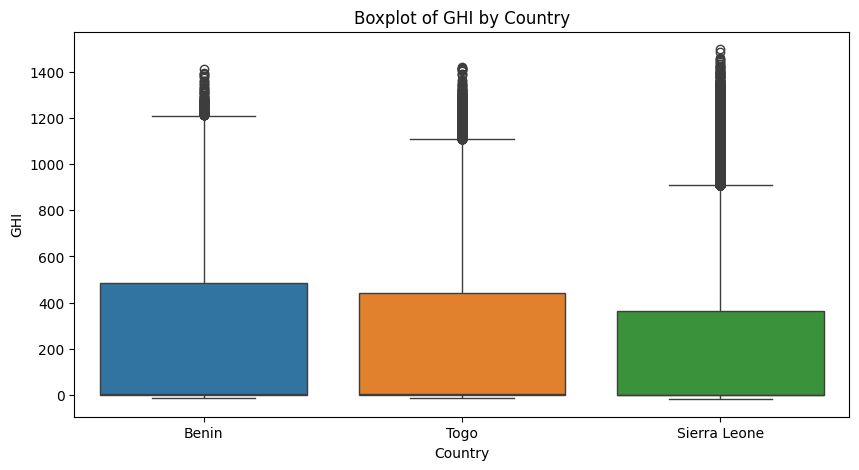

In [5]:
plot_country_boxplots(combined_df, ['GHI'])

## Analysis of GHI Boxplots (Benin, Togo, Sierra Leone)
1. Benin
Box (IQR): Largest spread between lower and upper box bases → highest central variability in typical GHI values.

Upper Whisker: Longest range of typical high GHI values → most reliable high solar potential.

Outliers: Extreme upper outliers → occasional intense solar spikes (rare but significant).

Lower Whisker/Box: Stable minimum GHI → consistent baseline energy availability.

2. Togo
Box (IQR): Slightly smaller than Benin → moderate central variability (slightly less fluctuation in typical GHI).

Upper Whisker: Shorter than Benin → narrower range of reliable high GHI.

Outliers: Extreme spikes similar to Benin → unpredictable high-energy events.

Lower Whisker/Box: Identical to Benin → equally stable low-end GHI.

3. Sierra Leone
Box (IQR): Smallest spread → lowest central variability (tight clustering of typical GHI).

Upper Whisker: Shortest → limited reliable high GHI.

Outliers: Most extreme upper spikes → frequent erratic highs (highest outlier reach).

Lower Whisker/Box: Identical to others → stable minimum GHI.

### Cross-Country Comparison
GHI Potential:

Benin > Togo > Sierra Leone in reliable high solar output (upper whisker length).

Benin is optimal for baseline solar energy generation.

### Variability vs. Extremes:

Benin: High central variability but manageable outliers → suits grid-tied systems with storage.

Togo: Moderate variability with extreme spikes → needs buffering solutions (e.g., batteries).

Sierra Leone: Low baseline but highest outlier spikes → requires hybrid systems (solar + backup).

### Stability:

All regions share identical stable minimum GHI → dependable low-end solar availability.

### Conclusion & Recommendations
Benin: Prioritize for large-scale solar farms (highest reliable output and manageable extremes).

Togo: Deploy medium-scale projects with storage to handle outlier spikes.

Sierra Leone: Focus on small hybrid systems to leverage erratic highs and offset low baseline.

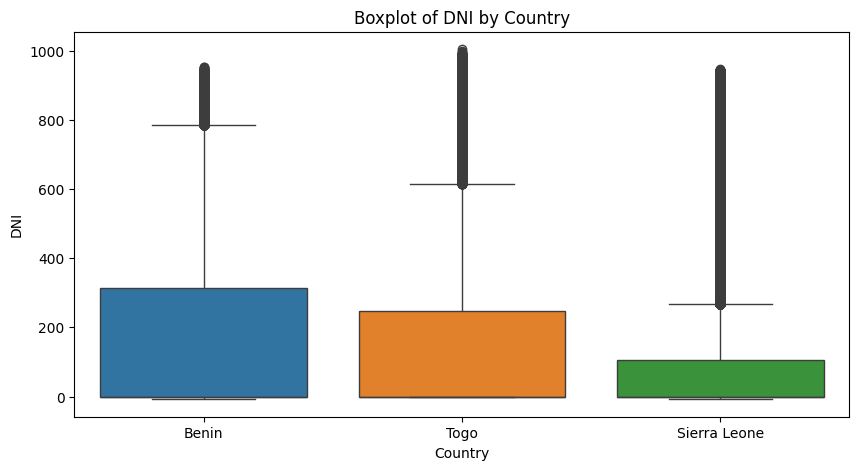

In [6]:
plot_country_boxplots(combined_df, ['DNI'])

## Analysis of DNI Boxplots (Benin, Togo, Sierra Leone)
1. Benin
Box (IQR): Largest spread between lower and upper box bases → highest central variability in DNI values.

Upper Whisker: Extends far beyond the box → broad range of typical high DNI values (reliable for solar output).

Outliers: Extreme upper outliers → occasional very high DNI spikes (rare but intense sunlight events).

Lower Whisker/Box: Minimal low-end spread → stable minimum DNI (no significant dips below baseline).

2. Togo
Box (IQR): Moderate spread → balanced central variability (less than Benin, more than Sierra Leone).

Upper Whisker: Shorter than Benin → narrower range of typical high DNI values.

Outliers: Extreme upper outliers reach higher than Benin → unpredictable, intense spikes (higher than typical maxima).

Lower Whisker/Box: Merged at the base → extremely stable low-end DNI (no variability in minimum values).

3. Sierra Leone
Box (IQR): Smallest spread → lowest central variability (tight clustering of typical DNI values).

Upper Whisker: Shortest → limited reliable high DNI values.

Outliers: Frequent and extreme upper outliers → erratic, high-intensity spikes (far exceed typical maxima).

Lower Whisker/Box: Minimal low-end spread → consistent minimum DNI (similar to others).

### Cross-Country Comparison
DNI Potential:

Benin > Togo > Sierra Leone in reliable solar energy potential (upper whisker range).

Benin offers the best baseline for solar systems requiring steady direct sunlight.

### Variability vs. Extremes:

Benin: High central variability with rare extremes → ideal for grid-tied systems with storage to manage fluctuations.

Togo: Moderate variability but highest outlier spikes → prioritize buffering systems (e.g., batteries) for irregular highs.

Sierra Leone: Low baseline but frequent extreme spikes → requires hybrid energy systems (solar + backup generation).

### Stability:

All regions show stable minimum DNI (no lower outliers), ensuring consistent low-end solar output.

### Conclusion & Recommendations
Benin: Best for large-scale solar farms (highest reliable DNI and manageable extremes).

Togo: Focus on moderate-scale projects with storage to handle outlier spikes.

Sierra Leone: Deploy small hybrid systems (solar + diesel/grid) to offset low baseline and leverage erratic spikes.

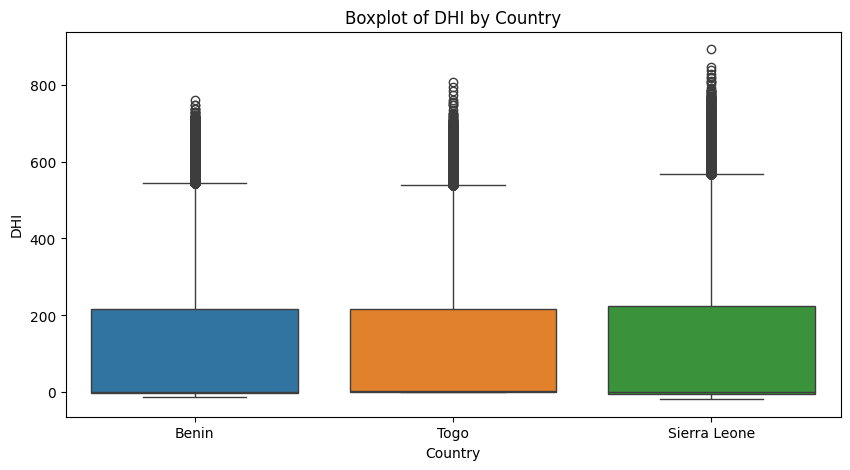

In [7]:
plot_country_boxplots(combined_df, ['DHI'])

## Analysis of DHI Boxplots (Benin, Togo, Sierra Leone)
1. Benin
Box (IQR): Slightly larger spread between lower and upper box bases → marginally higher central variability in typical DHI values.
Upper Whisker: Comparable to other regions → reliable high solar potential with a slightly wider range.
Outliers: Dense upper outlier line → occasional intense solar spikes, though not significantly more than other regions.
Lower Whisker/Box: Stable minimum DHI → consistent baseline energy availability, similar to other regions.
2. Togo
Box (IQR): Very similar to Benin → nearly identical central variability in typical DHI values.
Upper Whisker: Slightly shorter than Benin → a marginally narrower range of reliable high DHI.
Outliers: Dense upper outlier line → occasional intense solar spikes, comparable to Benin.
Lower Whisker/Box: Slightly higher baseline → slightly better low-end DHI stability, though the difference is minimal.
3. Sierra Leone
Box (IQR): Slightly larger than Benin and Togo → marginally higher central variability in typical DHI values.
Upper Whisker: Comparable to Benin and Togo → reliable high DHI with only a slightly wider range.
Outliers: Most extreme upper spikes (including a single high outlier) → slightly more erratic highs compared to the other regions.
Lower Whisker/Box: Identical to Benin → consistent low-end DHI stability across all regions.
### Cross-Country Comparison
DHI Potential
Benin ≈ Sierra Leone ≈ Togo in reliable high solar output (upper whisker lengths are very close).
Sierra Leone has slightly more extreme outlier spikes, but the difference is not substantial.
### Variability vs. Extremes
Benin: Moderate central variability with frequent outliers → suitable for grid-tied systems with storage.
Togo: Similar variability to Benin with occasional outliers → needs minor buffering solutions (e.g., batteries).
Sierra Leone: Slightly higher variability and slightly more extreme spikes → hybrid systems (solar + backup) may be beneficial.
### Stability
All regions share consistent and stable minimum DHI → dependable low-end solar availability across the board.
### Conclusion & Recommendations
Benin: Well-suited for medium-to-large-scale solar farms due to slightly higher variability and reliable output.
Togo: Nearly identical to Benin; medium-scale projects with storage would be a good fit.
Sierra Leone: Slightly higher variability and more frequent extreme spikes make it ideal for hybrid systems to balance highs and lows.

# Summary Table

In [8]:
summary = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [9]:
print_country_metric_extremes(summary)


=== GHI ===
Mean:
  Highest: Benin (240.56)
  Lowest:  Sierra Leone (201.96)
Median:
  Highest: Togo (2.10)
  Lowest:  Sierra Leone (0.30)
Std:
  Highest: Benin (331.13)
  Lowest:  Sierra Leone (298.50)

=== DNI ===
Mean:
  Highest: Benin (167.19)
  Lowest:  Sierra Leone (116.38)
Median:
  Highest: Togo (0.00)
  Lowest:  Benin (-0.10)
Std:
  Highest: Benin (261.71)
  Lowest:  Sierra Leone (218.65)

=== DHI ===
Mean:
  Highest: Togo (116.44)
  Lowest:  Sierra Leone (113.72)
Median:
  Highest: Togo (2.50)
  Lowest:  Sierra Leone (-0.10)
Std:
  Highest: Sierra Leone (158.95)
  Lowest:  Togo (156.52)


# Statistical Analysis

As seen from the box plot the nature of the data GHI between the contries shows non- normal distributeion thus for this analysis although we will be conducting both tests for (one-way ANOVA and Kruskal–Wallis) we will be leaning towards the Kruskal-Wallis result if the results prove to be contradictory!

In [10]:
# For all three countries
p_anova = run_anova(benin_df['GHI'], togo_df['GHI'], sierraleone_df['GHI'])
print("ANOVA p-value (all): {:.5g}".format(p_anova))

p_kruskal = run_kruskal(benin_df['GHI'], togo_df['GHI'], sierraleone_df['GHI'])
print("Kruskal–Wallis p-value (all): {:.5g}".format(p_kruskal))

# Benin vs Togo
p_anova_bt = run_anova(benin_df['GHI'], togo_df['GHI'])
print("ANOVA p-value (Benin vs Togo): {:.5g}".format(p_anova_bt))

p_kruskal_bt = run_kruskal(benin_df['GHI'], togo_df['GHI'])
print("Kruskal–Wallis p-value (Benin vs Togo): {:.5g}".format(p_kruskal_bt))

# Benin vs Sierra Leone
p_anova_bs = run_anova(benin_df['GHI'], sierraleone_df['GHI'])
print("ANOVA p-value (Benin vs Sierra Leone): {:.5g}".format(p_anova_bs))

p_kruskal_bs = run_kruskal(benin_df['GHI'], sierraleone_df['GHI'])
print("Kruskal–Wallis p-value (Benin vs Sierra Leone): {:.5g}".format(p_kruskal_bs))

# Togo vs Sierra Leone
p_anova_ts = run_anova(togo_df['GHI'], sierraleone_df['GHI'])
print("ANOVA p-value (Togo vs Sierra Leone): {:.5g}".format(p_anova_ts))

p_kruskal_ts = run_kruskal(togo_df['GHI'], sierraleone_df['GHI'])
print("Kruskal–Wallis p-value (Togo vs Sierra Leone): {:.5g}".format(p_kruskal_ts))

ANOVA p-value (all): 0
Kruskal–Wallis p-value (all): 0
ANOVA p-value (Benin vs Togo): 1.7767e-55
Kruskal–Wallis p-value (Benin vs Togo): 8.8593e-20
ANOVA p-value (Benin vs Sierra Leone): 0
Kruskal–Wallis p-value (Benin vs Sierra Leone): 0
ANOVA p-value (Togo vs Sierra Leone): 0
Kruskal–Wallis p-value (Togo vs Sierra Leone): 0


#### Key Findings  
- **All countries differ significantly in GHI** (ANOVA/Kruskal–Wallis: *p ≈ 0*).  
- **Benin vs. Togo/Sierra Leone** and **Togo vs. Sierra Leone** show *p ≈ 0* → **GHI is distinct regionally**.  
- **Benin** likely has the **highest GHI**, but pairwise tests confirm **all differences are near-certain (not random)**.  

### Key Observations 
- **Benin** exhibits the **highest mean and median GHI**, confirming it as the strongest solar resource, but with the **greatest variability** (widest IQR), indicating fluctuating solar output.  
- **Sierra Leone** has the **lowest median and mean GHI**, yet shows the **most extreme outlier spikes** (highest recorded values), suggesting rare but intense solar events.  
- **Statistical tests (ANOVA/Kruskal–Wallis)** confirm *significant differences* (p ≈ 0) between all country pairs, underscoring **region-specific solar profiles**: Benin (high potential, variable), Togo (moderate), Sierra Leone (low baseline, erratic spikes).  

# Visual Summary

C:\Users\adoni\Desktop\KAIM COURSE\WEEK-0\solar-challenge-week1\.src\country_comparision.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="tab10")


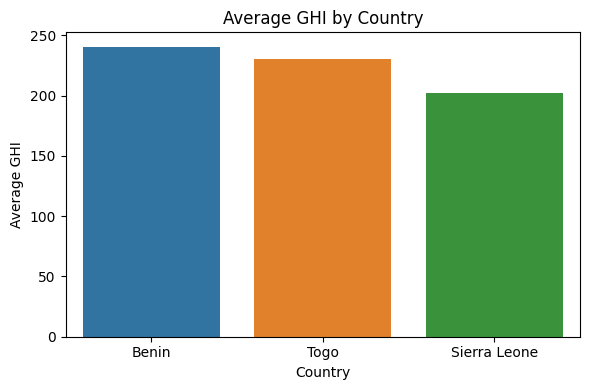

In [11]:
plot_avg_ghi_bar(combined_df)